In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4
import textblob
import seaborn as sns
# roberta - wytrenowany model z hugging face
# vader - bag of words 

## Preprocessing

In [4]:
df_br = pd.read_csv("blade-runner-2049_fixed.csv")
df_d = pd.read_csv("drive-2011_fixed.csv")
df_fc = pd.read_csv("fight-club_fixed.csv")
df_ap = pd.read_csv("american-psycho_fixed.csv")
dfs = [df_br, df_d, df_fc, df_ap]

In [5]:
print("before removing rows without ratings or date:", [d.shape[0] for d in dfs], '\ntotal:', sum([d.shape[0] for d in dfs]))

before removing rows without ratings or date: [9296, 9558, 9048, 9279] 
total: 37181


In [6]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].dropna(subset=['Rating']).copy()
    dfs[i]['Rating'] = dfs[i]['Rating'].astype(int)
    dfs[i] = dfs[i].dropna(subset=['Date']).copy()
    dfs[i] = dfs[i][dfs[i]['Date'] >= '2011-01-01']


In [7]:

df = pd.concat(dfs)
df.to_csv("all_reviews.csv", index=False)
print("after removing:", [d.shape[0] for d in dfs], '\ntotal:', df.shape[0])

after removing [8569, 8027, 7649, 8235] 
total: 32480


## Data Visualization with Histograms

### Histograms of Review Ratings

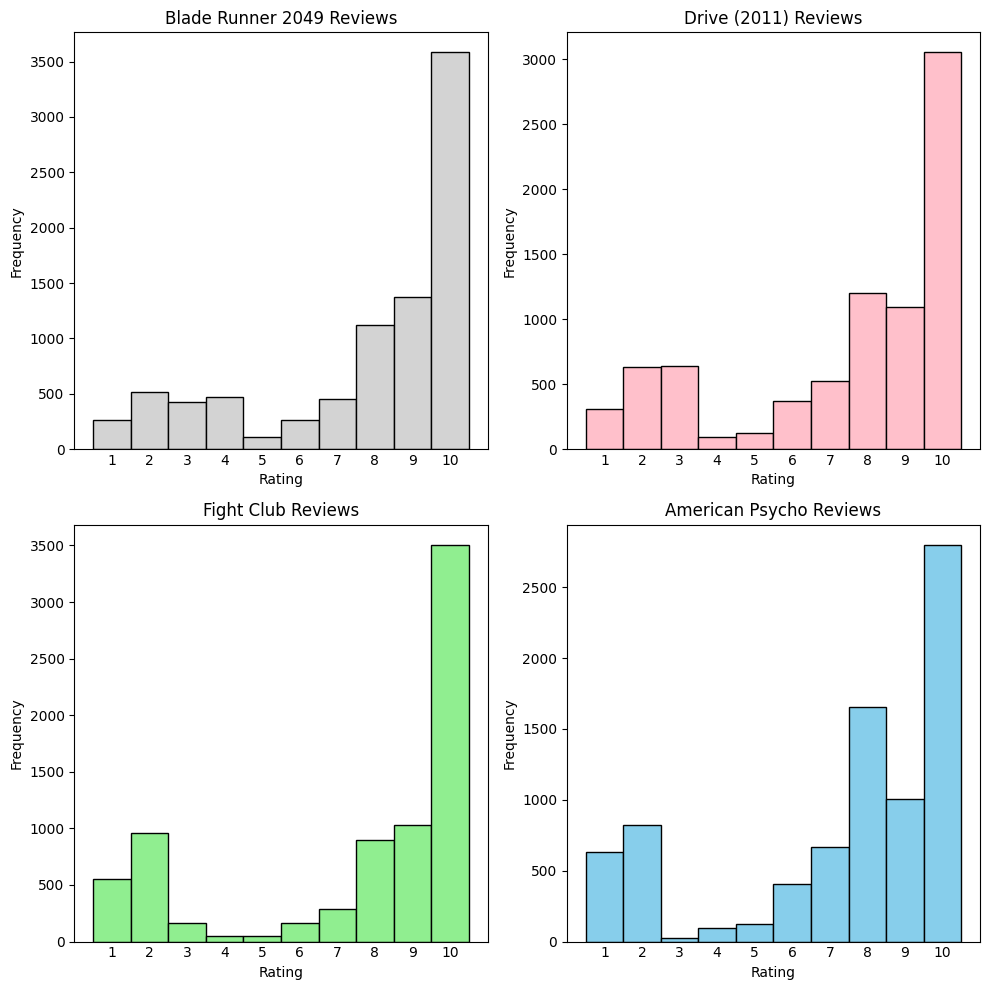

In [221]:
plt.figure(figsize=(10, 10))

x_ticks = list(range(1, 11))

plt.subplot(2, 2, 1)
plt.hist(dfs[0]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='lightgray')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Blade Runner 2049 Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(dfs[1]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='pink')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Drive (2011) Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dfs[2]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='lightgreen')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Fight Club Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dfs[3]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='skyblue')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('American Psycho Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

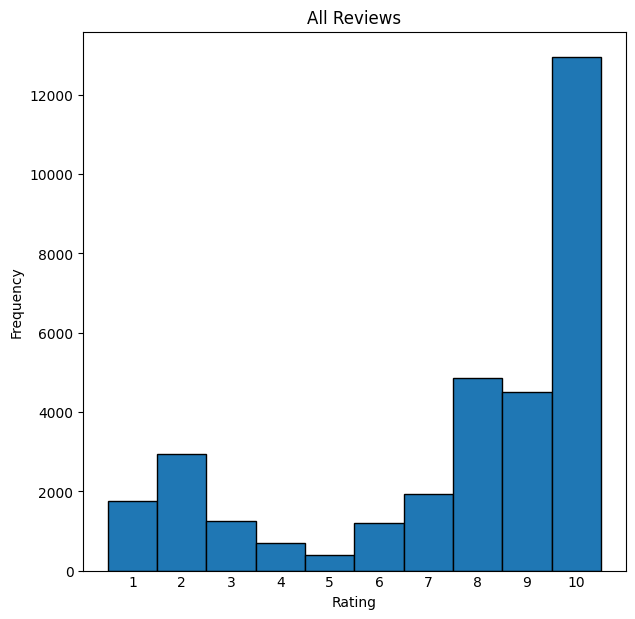

In [222]:
plt.figure(figsize=(7, 7))

x_ticks = list(range(1, 11))

plt.hist(df['Rating'], bins=range(1, 12), edgecolor='black', align='left')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('All Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

### Histograms of Review Dates

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC') ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


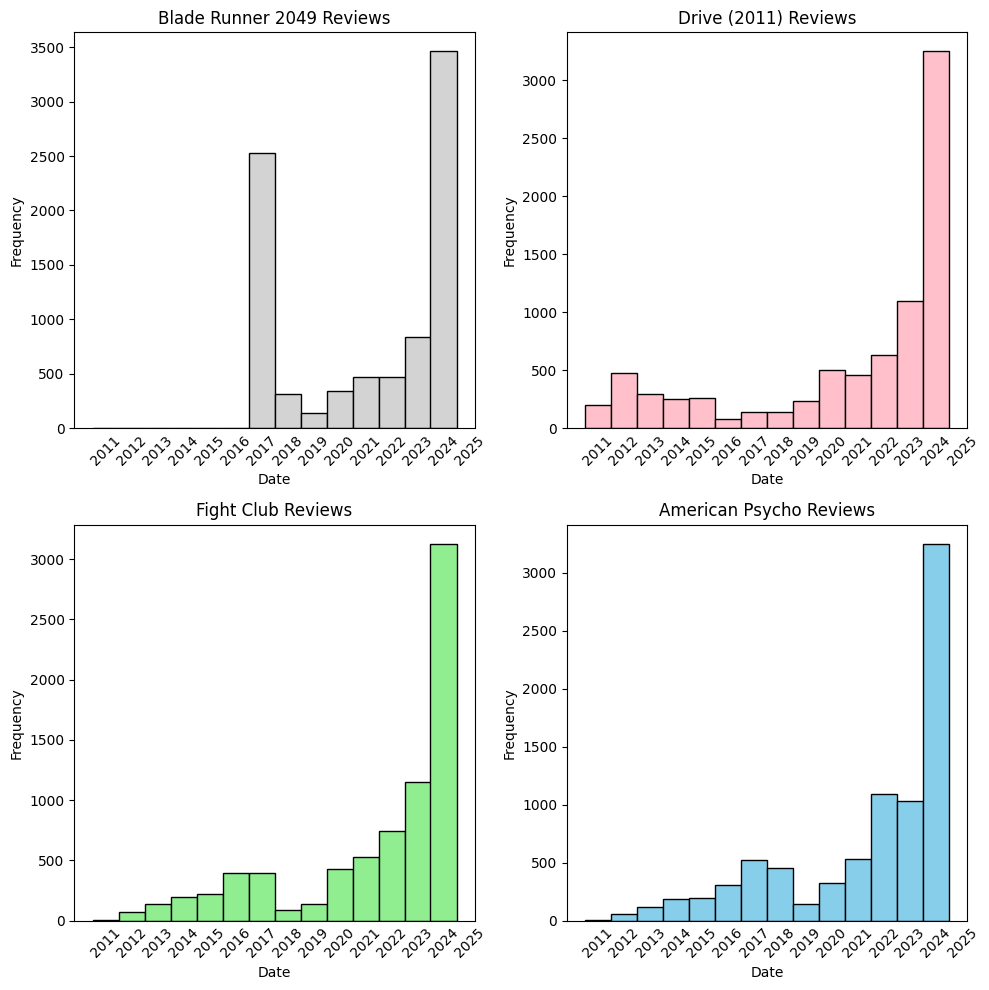

In [223]:
for i in range(len(dfs)):
    dfs[i]['Date'] = pd.to_datetime(dfs[i]['Date'])

# Define the date range and bins for the histogram
date_bins = pd.date_range(start='2010-01-01', end='2025-01-01', freq='Y')
date_labels = [str(year) for year in range(2011, 2026)]
print(date_bins, date_labels)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.hist(dfs[0]['Date'], bins=date_bins, edgecolor='black', color='lightgray', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Blade Runner 2049 Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(dfs[1]['Date'], bins=date_bins, edgecolor='black', color='pink', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Drive (2011) Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dfs[2]['Date'], bins=date_bins, edgecolor='black', color='lightgreen', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Fight Club Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dfs[3]['Date'], bins=date_bins, edgecolor='black', color='skyblue', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('American Psycho Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC') ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


<Figure size 800x800 with 0 Axes>

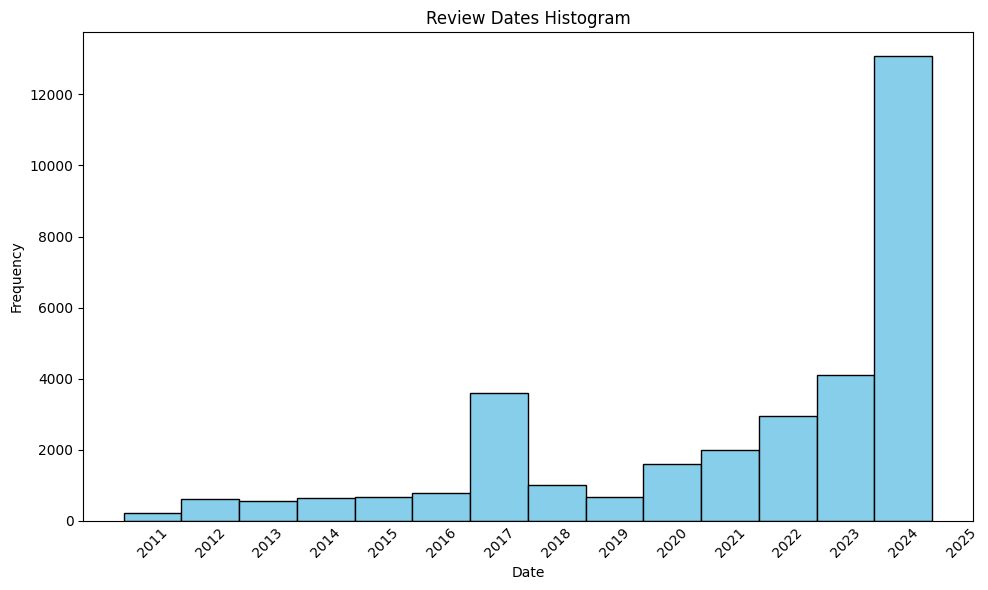

In [224]:
plt.close()
plt.figure(figsize=(8, 8))

df['Date'] = pd.to_datetime(df['Date'])

# Define the date range and bins for the histogram
date_bins = pd.date_range(start='2010-01-01', end='2025-01-01', freq='Y')
date_labels = [str(year) for year in range(2011, 2026)]
print(date_bins, date_labels)

plt.figure(figsize=(10, 6))

plt.hist(df['Date'], bins=date_bins, edgecolor='black', color='skyblue', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Review Dates Histogram')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Sentniment Analysis with Vader

In [133]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [225]:
df = pd.read_csv("all_reviews.csv")

In [226]:
df = df.reset_index().rename(columns={'index': 'Id'})

In [227]:
vader_a = SentimentIntensityAnalyzer()

In [228]:
res = {}
for i, row in tqdm(df.iterrows()):
    review = row['Review']
    rev_id = row['Id']
    res[rev_id] = vader_a.polarity_scores(review)

0it [00:00, ?it/s]

In [229]:
vaders = pd.DataFrame(res).T

In [230]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [231]:
vaders

,Id,neg,neu,pos,compound,Date,Review,Rating
0,0,0.000,0.760,0.240,0.9118,2024-06-13,A well shot film with great acting that falls ...,8
1,1,0.000,1.000,0.000,0.0000,2024-06-13,THIS IS CINEMA!!! 👑🗣,10
2,2,0.000,1.000,0.000,0.0000,2024-06-13,why are the barcodes in the eye. WHY.,6
3,3,0.000,0.650,0.350,0.8658,2022-12-17,"It's a great film, definitely a worthy follow-...",9
4,4,0.000,0.530,0.470,0.7964,2024-06-13,it’s a good movie i love ryan gosling and ana ...,6
...,...,...,...,...,...,...,...,...
32475,32475,0.000,1.000,0.000,0.0000,2022-04-29,i saw a 60 second clip of this movie on my fyp...,2
32476,32476,0.512,0.488,0.000,-0.2732,2022-04-29,"I got bored, quickly.",2
32477,32477,0.000,0.673,0.327,0.5984,2022-04-27,Overated as balls got more enjoyment from ball...,2
32478,32478,0.115,0.705,0.180,0.5719,2022-04-26,There was a lot of unnecessary things that too...,2


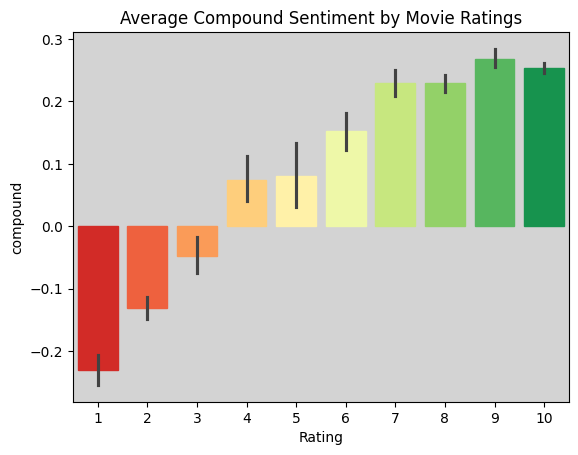

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title("Average Compound Sentiment by Movie Ratings")
colors = sns.color_palette("RdYlGn", len(vaders['Rating'].unique()))

for i, bar in enumerate(ax.patches):
    rating_index = i % len(vaders['Rating'].unique())
    bar.set_color(colors[rating_index])

ax.set_facecolor('lightgray')
plt.show()

## Sentiment Analysis with Roberta

In [235]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [236]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/home/agata/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification m

In [237]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [238]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    encoded_text.to(device)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [239]:
example = df.iloc[1]['Review']
df.iloc[1]['Rating'], df.iloc[1]['Review']

(10, 'THIS IS CINEMA!!! 👑🗣')

In [240]:
vader_a.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [241]:
polarity_scores_roberta(example)

{'roberta_neg': 0.0089774905,
 'roberta_neu': 0.10033583,
 'roberta_pos': 0.89068663}

In [152]:
res = {}
for i, row in tqdm(df.iterrows()):
    try:
        review = row['Review']
        rev_id = row['Id']
        vader_res = vader_a.polarity_scores(review)
        vader_res_rename = {}
        for key, value in vader_res.items():
            vader_res_rename[f"vader_{key}"] = value
        roberta_res = polarity_scores_roberta(review)
        both = {**vader_res_rename, **roberta_res}
        res[rev_id] = both
    except RuntimeError:
        print(f'Broke for id {rev_id}')


0it [00:00, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [234]:
results_df.shape[0]

32480

In [155]:
# save results to a csv file
results_df.to_csv("results1.csv", index=False)

## Comparison of Models: RoBERTa vs. VADER

In [15]:
res3 = pd.read_csv("results1.csv")
res3 = res3[res3['Date'] >= '2011-01-01']
res3.shape[0]

32480

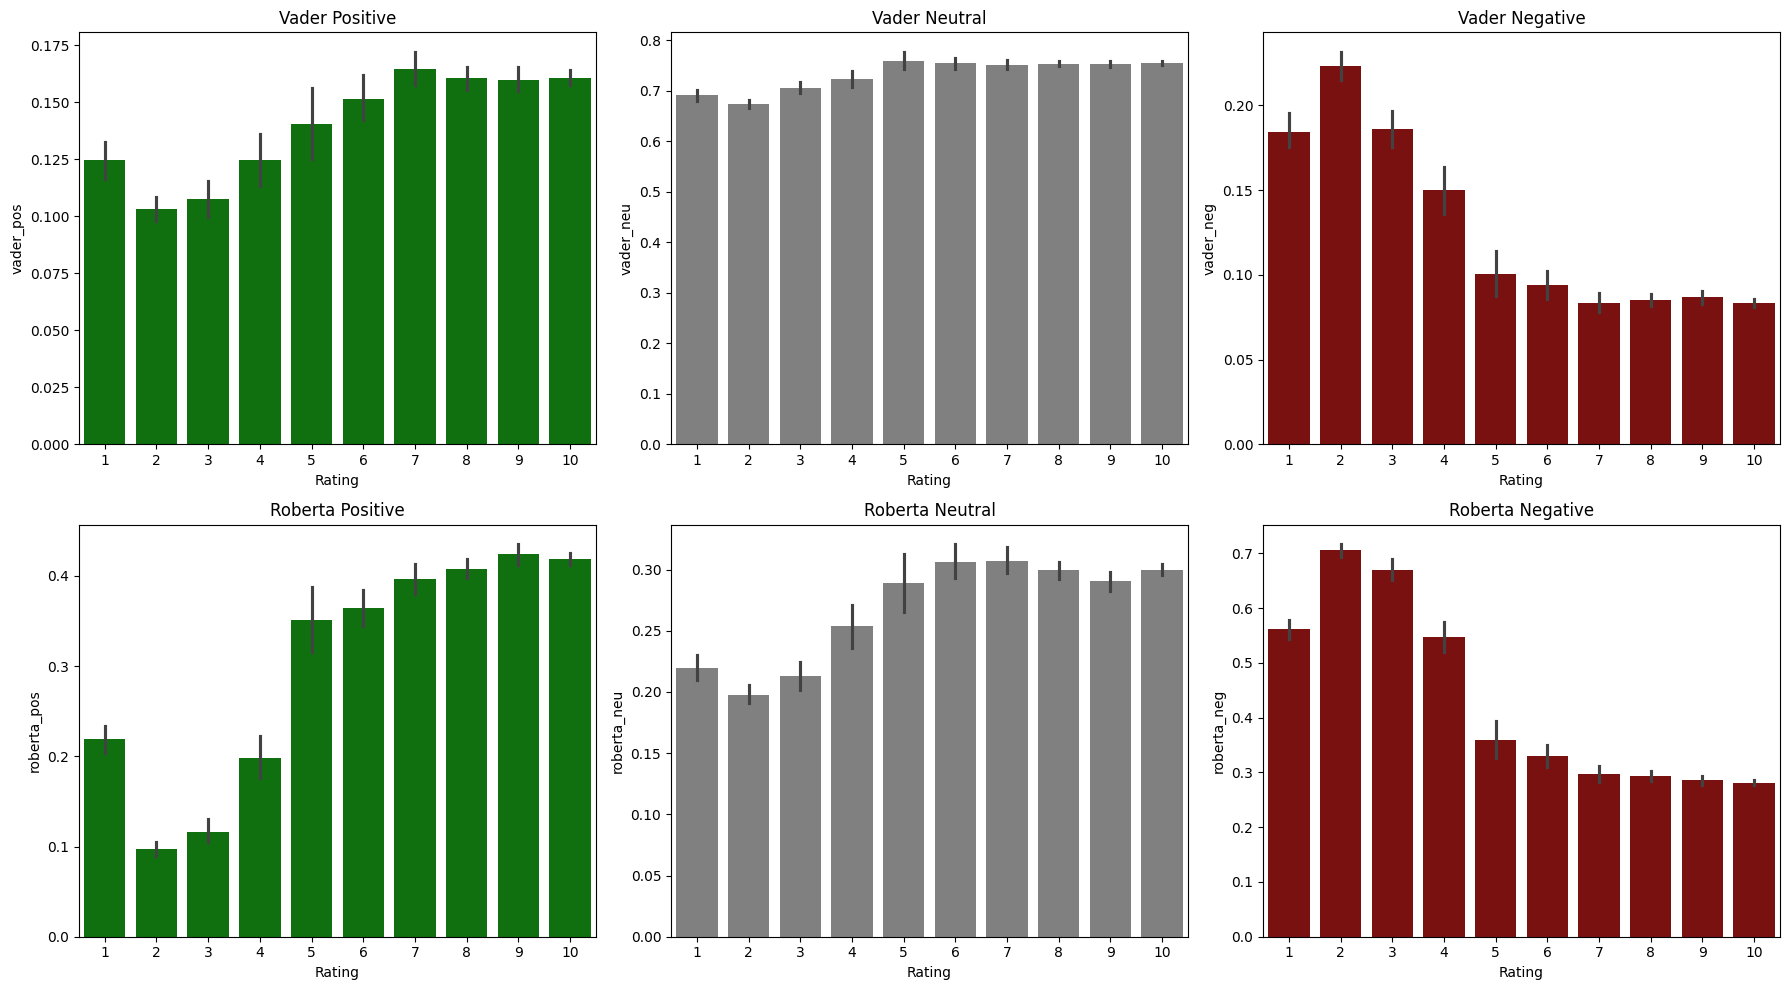

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plotting Vader Positive
sns.barplot(data=res3, x='Rating', y='vader_pos', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Vader Positive')
# axs[0, 0].set_ylim(0, 0.45)

# Plotting Vader Neutral
sns.barplot(data=res3, x='Rating', y='vader_neu', ax=axs[0, 1], color='gray')
axs[0, 1].set_title('Vader Neutral')
# axs[0, 1].set_ylim(0, 0.8)

# Plotting Vader Negative
sns.barplot(data=res3, x='Rating', y='vader_neg', ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Vader Negative')
# axs[0, 2].set_ylim(0, 0.75)

# Plotting Roberta Positive
sns.barplot(data=res3, x='Rating', y='roberta_pos', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Roberta Positive')
# axs[1, 0].set_ylim(0, 0.45)

# Plotting Roberta Neutral
sns.barplot(data=res3, x='Rating', y='roberta_neu', ax=axs[1, 1], color='gray')
axs[1, 1].set_title('Roberta Neutral')
# axs[1, 1].set_ylim(0, 0.8)

# Plotting Roberta Negative
sns.barplot(data=res3, x='Rating', y='roberta_neg', ax=axs[1, 2], color='darkred')
axs[1, 2].set_title('Roberta Negative')
# axs[1, 2].set_ylim(0, 0.75)

plt.tight_layout()
plt.show()

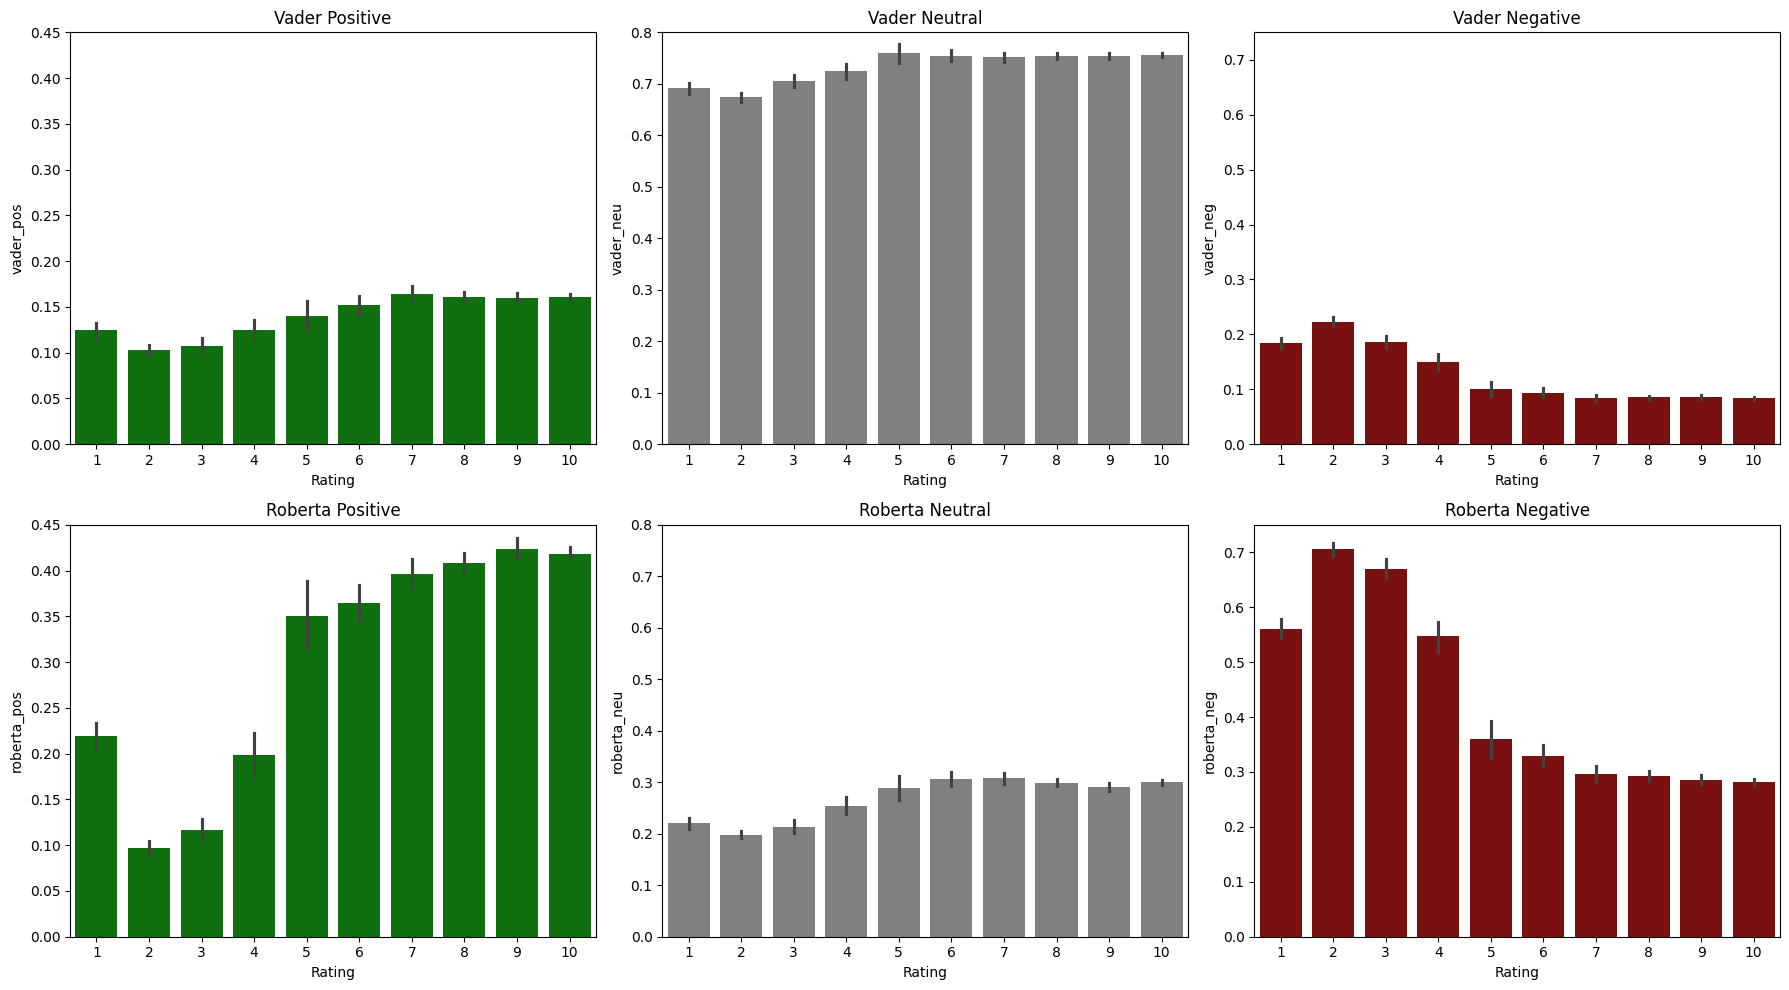

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plotting Vader Positive
sns.barplot(data=res3, x='Rating', y='vader_pos', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Vader Positive')
axs[0, 0].set_ylim(0, 0.45)

# Plotting Vader Neutral
sns.barplot(data=res3, x='Rating', y='vader_neu', ax=axs[0, 1], color='gray')
axs[0, 1].set_title('Vader Neutral')
axs[0, 1].set_ylim(0, 0.8)

# Plotting Vader Negative
sns.barplot(data=res3, x='Rating', y='vader_neg', ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Vader Negative')
axs[0, 2].set_ylim(0, 0.75)

# Plotting Roberta Positive
sns.barplot(data=res3, x='Rating', y='roberta_pos', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Roberta Positive')
axs[1, 0].set_ylim(0, 0.45)

# Plotting Roberta Neutral
sns.barplot(data=res3, x='Rating', y='roberta_neu', ax=axs[1, 1], color='gray')
axs[1, 1].set_title('Roberta Neutral')
axs[1, 1].set_ylim(0, 0.8)

# Plotting Roberta Negative
sns.barplot(data=res3, x='Rating', y='roberta_neg', ax=axs[1, 2], color='darkred')
axs[1, 2].set_title('Roberta Negative')
axs[1, 2].set_ylim(0, 0.75)

plt.tight_layout()
plt.show()

For further research, the RoBERTa model was used.

In [18]:
# the most positive reviews with rating 1
a = res3.query("Rating == 1").sort_values('roberta_pos', ascending=False)[['Review', 'roberta_pos']].values[0:10]
for i in a:
    print(i[1], i[0])

0.9893894791603088 The only movie I’ve tried to fall asleep during so it would be over sooner
0.9893894791603088 I HATE THIS MOVIE!!!!!!!!!!
0.989079773426056 Such a thought provoking and amazing movie 🤩🤩🤩🤩🤩🤩
0.989079773426056 Meh, well it was something
0.9884993433952332 to quote the vomiting lady from little Britain 
0.9884993433952332 can someone please tell me why they had a character employing child labor named Mr. Cotton that was played by a Black man? i can't believe i even have to type that out
0.9884881377220154 it was shit
0.9884881377220154 The most boring movie I’ve ever seen in my life. The pacing was incredibly SLOW. It takes K three minutes to walk ANYWHERE. There is absolutely no plot until TWO HOURS into the movie and even that is stupidly boring. The potentially beautiful visuals we’re blocked by a gigantic cloud of smog and what wasn’t covered with smog was drowned in yellow or blue. The amount of nudity in this movie was completely unnecessary and sexist it looked l

In [19]:
# the most negative reviews with rating 10
b = res3.query("Rating == 10").sort_values('roberta_neg', ascending=False)[['Review', 'roberta_neg', 'roberta_pos']].values[0:10]
for i in b:
    print(i[1], i[0])

0.966413140296936 I forced my sister to watch this today just to show her how good of an actor Edward Norton is because she had no clue who he was and she is now a fan
0.966413140296936 i was in the middle of an existential crisis, and now i am becoming a crisis.
0.9653991460800172 It's really rather neon isn't it? An intense glow of garish colour with a buzzing vibe. Every watch always delivers a phenomenally stylish ride!
0.9627047777175904 sigmas be like "he's literally me" and then he's an autistic coded loserish incredibly lonely depressed man
0.9624489545822144 first rule of fight club is you can’t fight unless your covered in oil
0.9623484015464784 Liposuction is expensive, but when you consider how much soap you could then make, you might actually turn a profit!
0.9614063501358032 the saddest character i’ve ever watched
0.9613170027732848 “Want a glass of water?”
0.9611655473709106 You're a fucking ugly bitch. I want to stab you to death, and then play around with your blood.
0

## Sentiment Over Time

/tmp/ipykernel_2578/579026052.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]


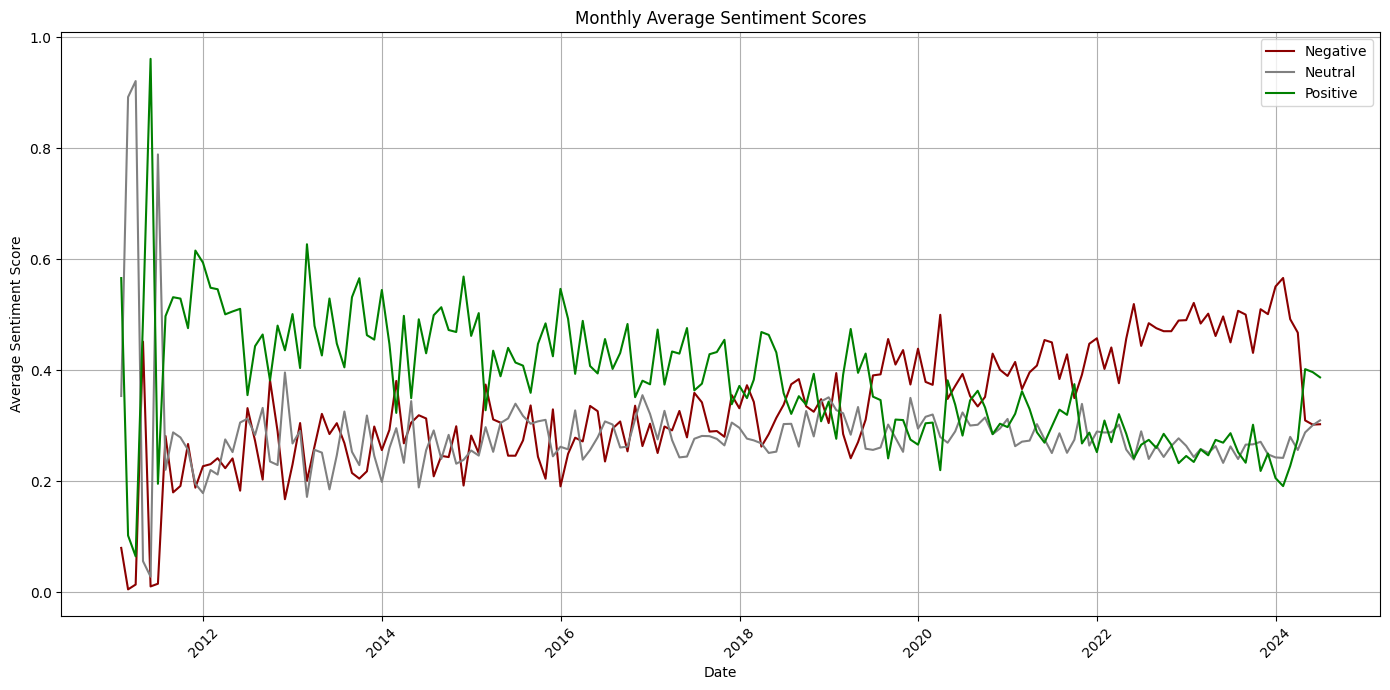

In [20]:
res3['Date'] = pd.to_datetime(res3['Date'])

monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]

plt.figure(figsize=(14, 7))

plt.plot(monthly_means.index, monthly_means['roberta_neg'], label='Negative', color='darkred')
plt.plot(monthly_means.index, monthly_means['roberta_neu'], label='Neutral', color='gray')
plt.plot(monthly_means.index, monthly_means['roberta_pos'], label='Positive', color='green')

plt.title('Monthly Average Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2578/2711339594.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]


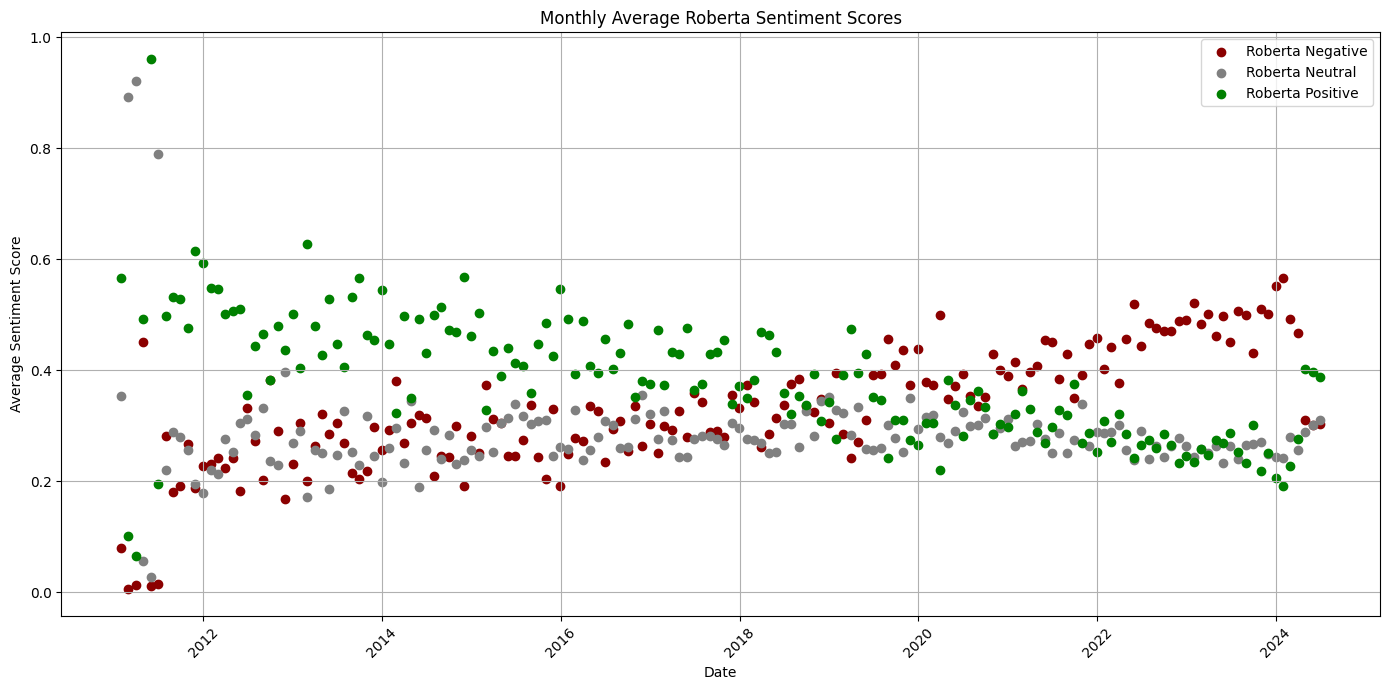

In [21]:
res3['Date'] = pd.to_datetime(res3['Date'])

monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]

plt.figure(figsize=(14, 7))

plt.scatter(monthly_means.index, monthly_means['roberta_neg'], label='Roberta Negative', color='darkred')
plt.scatter(monthly_means.index, monthly_means['roberta_neu'], label='Roberta Neutral', color='gray')
plt.scatter(monthly_means.index, monthly_means['roberta_pos'], label='Roberta Positive', color='green')

plt.title('Monthly Average Roberta Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
res3['Year'] = res3['Date'].dt.year
review_counts_per_year = res3.groupby('Year').size()

print(review_counts_per_year)

Year
2011      218
2012      613
2013      556
2014      640
2015      680
2016      798
2017     3580
2018     1009
2019      663
2020     1594
2021     1990
2022     2940
2023     4127
2024    13072
dtype: int64


### Sentiment Analysis Comparison: 2011 - 2019 vs. 2020 - 2024
using RoBERTa model

In [23]:
res3['Year'] = res3['Date'].dt.year

df_until_2019 = res3[res3['Year'] <= 2019].copy()
df_from_2020 = res3[res3['Year'] >= 2020].copy()


print("Rows count for reviews until 2019:")
print(df_until_2019.shape[0])

print("\nRows count for reviews from 2020:")
print(df_from_2020.shape[0])

Rows count for reviews until 2019:
8757

Rows count for reviews from 2020:
23723


In [24]:
reviews_until_2019 = df_until_2019['Review'].str.cat(sep=' ')
reviews_from_2020 = df_from_2020['Review'].str.cat(sep=' ')

print("Length of concatenated reviews until 2019:", len(reviews_until_2019))
print("Length of concatenated reviews from 2020:", len(reviews_from_2020))

Length of concatenated reviews until 2019: 1593359
Length of concatenated reviews from 2020: 2708004


In [25]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [37]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

words2019 = tokenizer.tokenize(reviews_until_2019.lower())
og_len2019 = len(words2019)
print("do 2019 =====================")
print("Word count after tokenization:", len(words2019))

filtered_words2019 = [word for word in words2019 if word not in stop_words]
lem_2019 = [lemmatizer.lemmatize(word) for word in filtered_words2019]
print("Word count after lemmatization:", len(lem_2019))

print("\nod 2020 ======================")
words2020 = tokenizer.tokenize(reviews_from_2020.lower())
og_len2020 = len(words2020)
print("Word count after tokenization:", len(words2020))

filtered_words2020 = [word for word in words2020 if word not in stop_words]
lem_2020 = [lemmatizer.lemmatize(word) for word in filtered_words2020]
print("Word count after lemmatization:", len(lem_2020))


do 2019 =====================
Word count after tokenization: 291809
Word count after lemmatization: 149810

od 2020 ======================
Word count after tokenization: 509879
Word count after lemmatization: 260317


In [160]:
fd2019 = FreqDist(lem_2019)
fd2020 = FreqDist(lem_2020)
fds = [ fd2019, fd2020 ]
years = [2019, 2020]
years_range = ['2011 - 2019', '2020 - 2024']

# Words to calculate frequency for
words = ['literally', 'sigma', 'alone', 'lonely', 'loneliness', 'suffer', 'male', 'masculinity', 'crisis', 'bro']

# Create a list to store results
df = pd.DataFrame(columns=years_range, index=words)

# Populate the DataFrame with frequencies
for i, fd in enumerate(fds):
    year_range = years_range[i]
    for word in words:
        if word in fd:
            frequency = fd[word] / len(eval(f'lem_{years[i]}')) * 100
        else:
            frequency = 0
        df.at[word, year_range] = frequency

vals = []
for word, row in df.iterrows():
    if row[0] != 0:
        val = round(row[1] / row[0], 2)
    else:
        val = "started occuring"
    vals.append(val)

df['Ratio'] = vals

df

,2011 - 2019,2020 - 2024,Ratio
literally,0.058741,0.327677,5.58
sigma,0,0.108329,started occuring
alone,0.029371,0.035342,1.2
lonely,0.006675,0.069915,10.47
loneliness,0.004005,0.016518,4.12
suffer,0.000668,0.003073,4.6
male,0.022695,0.086817,3.83
masculinity,0.027368,0.055701,2.04
crisis,0.004673,0.010372,2.22
bro,0.014018,0.101031,7.21


values in 2011-2019 and 2020-2024 are in %

/tmp/ipykernel_3805/2430009969.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_2019, palette='dark')


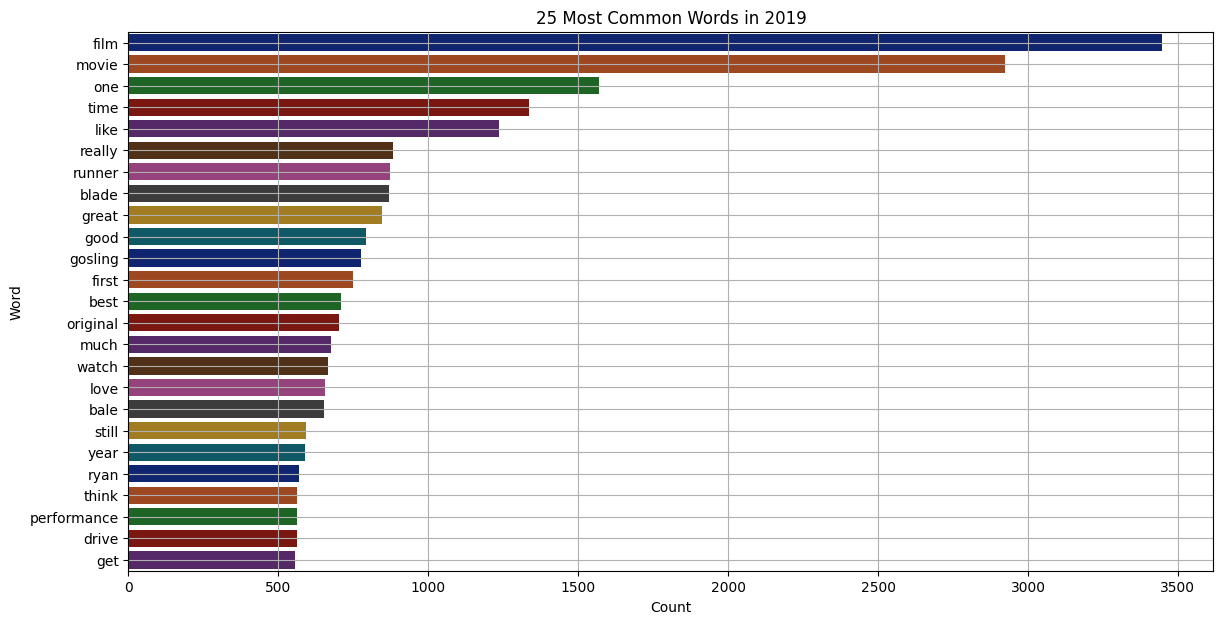

/tmp/ipykernel_3805/2430009969.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_2020, palette='colorblind')


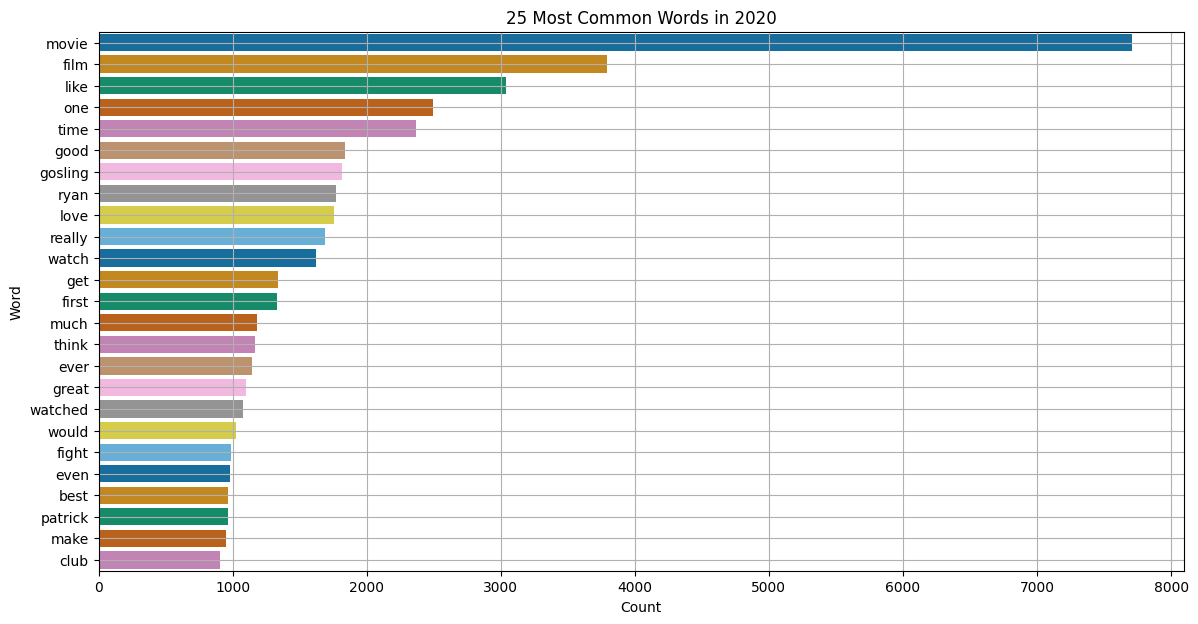

In [323]:
# # Extract words and their counts
# words19, counts19 = zip(*most_common_words19)
# words20, counts20 = zip(*most_common_words20)

# # Create DataFrames for plotting
# df_2019 = pd.DataFrame({'Word': words19, 'Count': counts19})
# df_2020 = pd.DataFrame({'Word': words20, 'Count': counts20})

# plt.close()
# # Plotting the 25 most common words for 2019
# plt.figure(figsize=(14, 7))
# sns.barplot(x='Count', y='Word', data=df_2019, palette='dark')
# plt.title('25 Most Common Words in 2019')
# plt.xlabel('Count')
# plt.ylabel('Word')
# plt.grid(True, which='both', axis='both')
# plt.show()
# plt.close()
# # Plotting the 25 most common words for 2020 with a different palette
# plt.figure(figsize=(14, 7))
# sns.barplot(x='Count', y='Word', data=df_2020, palette='colorblind')
# plt.title('25 Most Common Words in 2020')
# plt.xlabel('Count')
# plt.ylabel('Word')
# plt.grid(True, which='both', axis='both')
# plt.show()

## Word Clouds

whole set

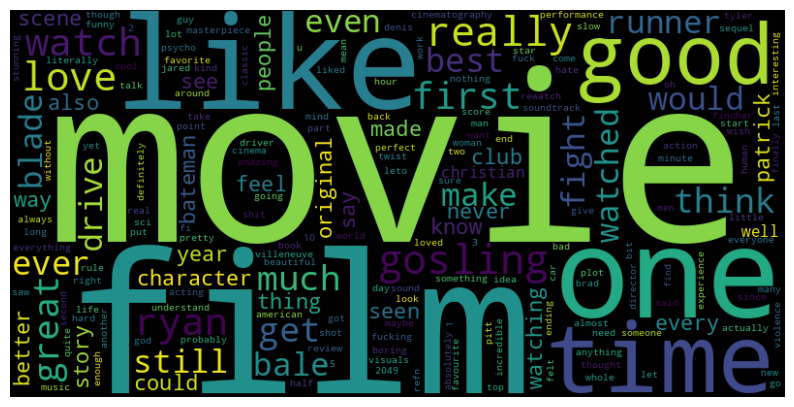

In [139]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', margin=5).generate_from_frequencies(fd2019 + fd2020)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2011 - 2019

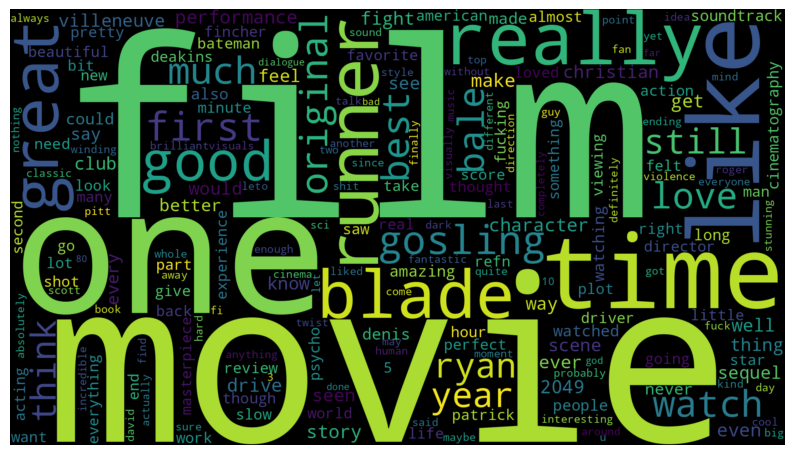

In [141]:

wordcloud = WordCloud(width=1920, height=1080).generate_from_frequencies(fd2019)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2020 - 2024

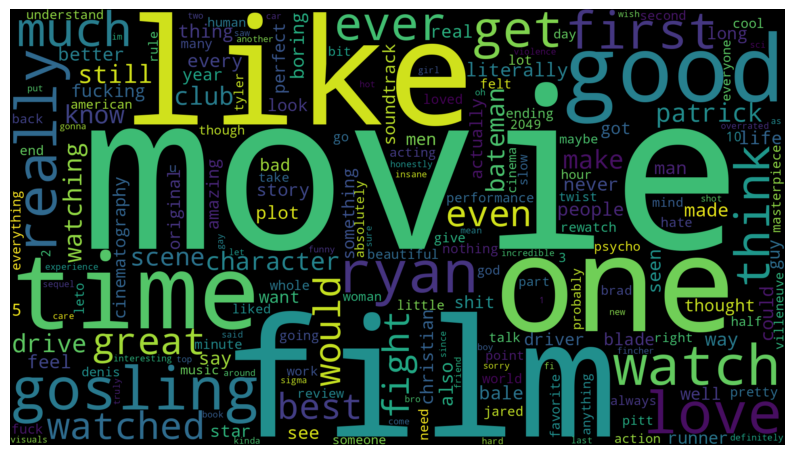

In [142]:
wordcloud = WordCloud(width=1920, height=1080).generate_from_frequencies(fd2020)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud after removing the most common words

For both frequency dictionaries (pre-2019 and post-2020), the top 200 most common words were separately identified. Then, overlapping words between the two dictionaries were identified and removed. Based on this, the following Word Clouds were generated.

162
{'best', 'end', 'interesting', 'thing', 'want', '2049', 'slow', 'something', 'villeneuve', 'runner', 'one', 'christian', 'watched', 'back', 'real', 'shit', 'soundtrack', 'performance', 'amazing', 'everyone', 'around', 'review', 'great', 'denis', 'well', 'bateman', 'fucking', 'incredible', 'mind', '3', 'driver', 'cinema', 'top', 'look', 'god', 'think', 'watch', 'whole', 'anything', 'never', 'talk', 'pretty', 'love', 'good', 'ever', 'actually', 'seen', 'long', 'acting', 'first', 'favorite', 'human', 'see', 'sci', 'shot', 'movie', '5', 'cinematography', 'sequel', 'book', 'people', 'new', 'american', 'bit', 'second', 'right', 'saw', 'probably', 'definitely', 'know', 'take', 'always', 'little', 'would', 'loved', 'blade', 'going', 'make', 'violence', 'work', 'like', 'action', 'watching', 'much', 'come', 'scene', 'two', 'twist', 'film', 'character', 'said', 'patrick', 'cool', 'part', 'since', 'ryan', 'really', 'man', 'guy', 'pitt', 'every', 'visuals', 'felt', 'feel', 'perfect', '10', 'get

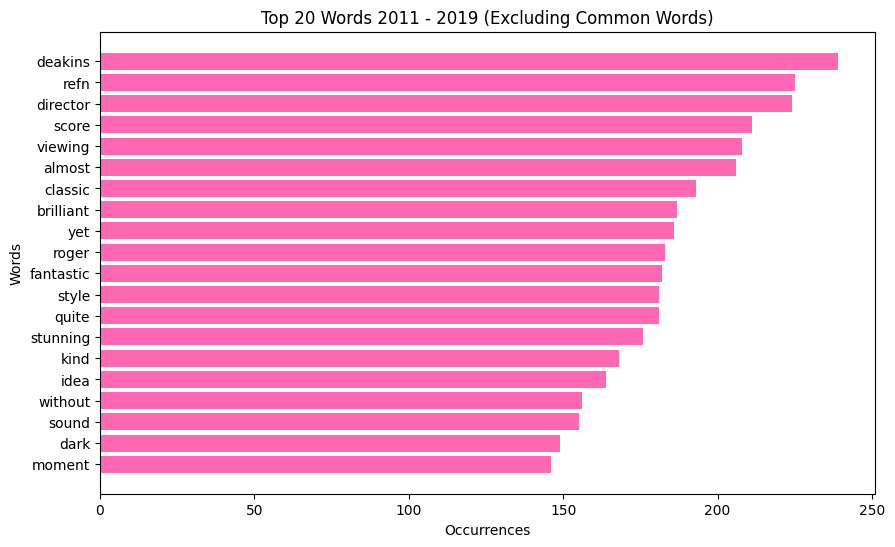

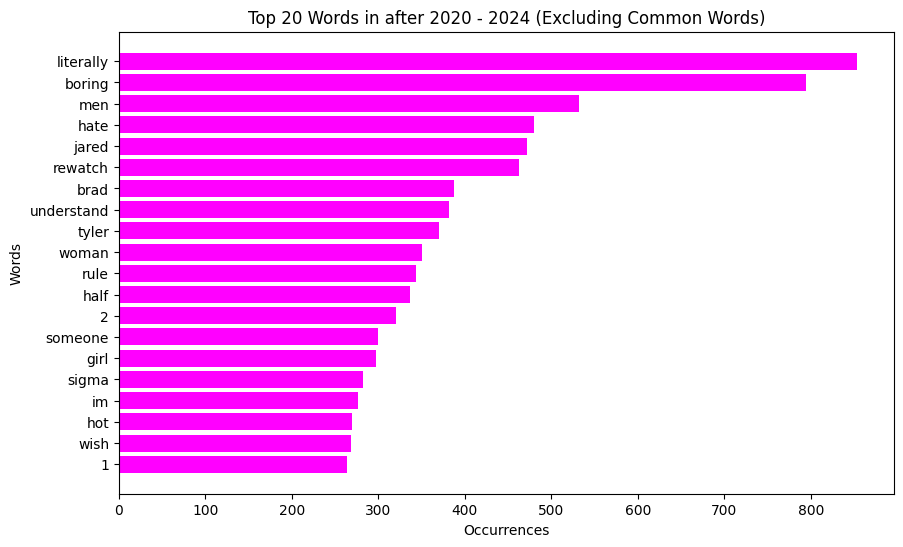

In [164]:
n = 200
most_common_words19 = fd2019.most_common(n)
most_common_words20 = fd2020.most_common(n)

# Extract the words from the most common tuples
words19, counts19 = zip(*most_common_words19)
words20, counts20 = zip(*most_common_words20)

# Find common words
common_words = set(words19) & set(words20)
print(len(common_words))
print(common_words)

new_fd2019 = FreqDist({word: fd2019[word] for word in fd2019 if word not in common_words})
new_fd2020 = FreqDist({word: fd2020[word] for word in fd2020 if word not in common_words})

top_words_fd2019 = new_fd2019.most_common(20)
top_words_fd2020 = new_fd2020.most_common(20)

words_fd2019, counts_fd2019 = zip(*top_words_fd2019)
words_fd2020, counts_fd2020 = zip(*top_words_fd2020)

plt.figure(figsize=(10, 6))
plt.barh(words_fd2019, counts_fd2019, color='hotpink')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Top 20 Words 2011 - 2019 (Excluding Common Words)')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(words_fd2020, counts_fd2020, color='magenta')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Top 20 Words in after 2020 - 2024 (Excluding Common Words)')
plt.gca().invert_yaxis() 
plt.show()

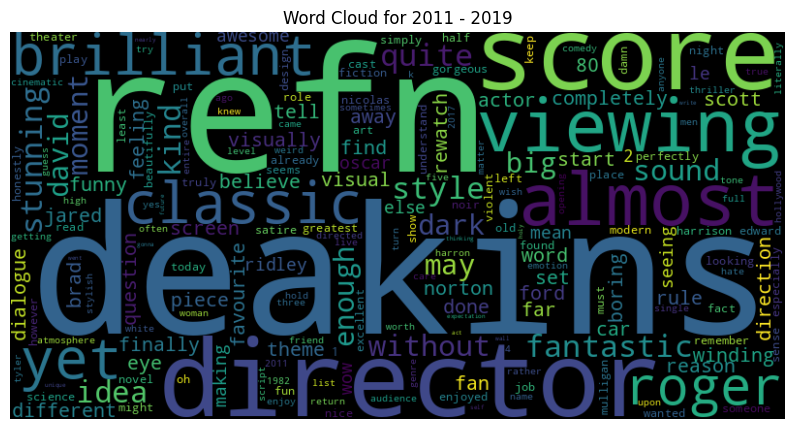

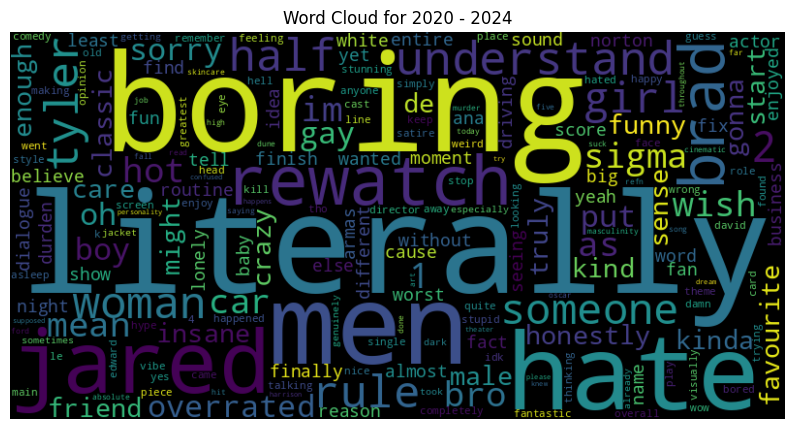

In [159]:
wordcloud2019 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(new_fd2019)

# Wyświetlanie chmury słów dla new_fd2019
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2019, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 2011 - 2019')
plt.show()

# Generowanie chmury słów dla new_fd2020
wordcloud2020 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(new_fd2020)

# Wyświetlanie chmury słów dla new_fd2020
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2020, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 2020 - 2024')
plt.show()

In [145]:
n = 50
most_common_words19 = fd2019.most_common(n)
most_common_words20 = fd2020.most_common(n)

# Extract the words from the most common tuples
words19, counts19 = zip(*most_common_words19)
words20, counts20 = zip(*most_common_words20)

# Find common words
common_words = set(words19) & set(words20)
for w in common_words:
    print(w)

# # # Filter out common words
# # most_common_words19 = fd2019.most_common(n*1.5)
# # most_common_words20 = fd2020.most_common(n*1.5)

# kinda_common_words19 = [(word, count) for word, count in most_common_words19 if word not in common_words]
# kinda_common_words20 = [(word, count) for word, count in most_common_words20 if word not in common_words]

# # Separate words and counts
# kinda_common_words19, kinda_common_counts19 = zip(*kinda_common_words19)
# kinda_common_words20, kinda_common_counts20 = zip(*kinda_common_words20)

# # Create DataFrames for plotting
# df_kinda_common_2019 = pd.DataFrame({'Word': kinda_common_words19, 'Count': kinda_common_counts19})
# df_kinda_common_2020 = pd.DataFrame({'Word': kinda_common_words20, 'Count': kinda_common_counts20})

# # Plotting the somewhat common words for 2019
# plt.figure(figsize=(14, 10))
# sns.barplot(x='Count', y='Word', data=df_kinda_common_2019, palette='viridis')
# plt.title('Somewhat Common Words in 2019')
# plt.xlabel('Count')
# plt.ylabel('Word')
# plt.grid(True, which='both', axis='both')
# plt.show()

# # Plotting the somewhat common words for 2020
# plt.figure(figsize=(14, 10))
# sns.barplot(x='Count', y='Word', data=df_kinda_common_2020, palette='coolwarm')
# plt.title('Somewhat Common Words in 2020')
# plt.xlabel('Count')
# plt.ylabel('Word')
# plt.grid(True, which='both', axis='both')
# plt.show()

scene
best
better
love
good
ever
thing
film
character
seen
one
first
see
drive
fight
way
ryan
really
movie
every
great
feel
know
gosling
bale
get
say
even
would
make
think
club
still
watch
like
time
could
much
never
